In [1]:
from PIL import Image
import os

In [2]:
# opening the image
image_path = "Lena.jpg"
image = Image.open(image_path)

#### Part 1

In [3]:
# get the dimensions of the image
width, height = image.size
print(f"width: {width}\nheight: {height}")

width: 497
height: 373


Compression rate = Uncompressed size of image / File sizee
uncompressed size: the theoretical size of the image stored without compression, calculated based on the dimensions of the image and the number of bits per pixel.

file size: the acutal size of the image on the disk, measured in bytes
 



###### finding the acutal number of bits

In [4]:
# not assuming 24 bits, check the image mode
image_mode = image.mode
print(f"image mode: {image_mode}")

image mode: RGB


In [5]:
# calculate the size of uncompressed image in bits based on the image mode
if image_mode == 'RGB':
    bits_per_channel = 8
    num_channels = 3
elif image_mode == 'RGBA':
    bits_per_channel = 8
    num_channels = 4
else:
    # for other modes (grayscale), assume 8 bits per channel
    bits_per_channel = 8
    num_channels = 1

In [6]:
# calculate uncompressed image size
uncompressed_size = width * height * bits_per_channel * num_channels
print(f"Uncompressed size: {uncompressed_size}")

Uncompressed size: 4449144


In [7]:
# get the file size of the image
file_size = os.path.getsize(image_path) * 8  # covert bytes to bits
print(f"file size: {file_size}")

file size: 355072


In [8]:
# calculate the compression rate
compression_rate = uncompressed_size / file_size

In [9]:
# display results
print(f"Dimensions of the image: {width} x {height}")
print(f"Compression rate: {compression_rate}")

Dimensions of the image: 497 x 373
Compression rate: 12.530258651766403


#### Part 2
##### convert the image to YCbCr, increase Y component, and convert back to RGB:

In [10]:
# convert the image to YCbCr
image_ycbcr = image.convert('YCbCr')

In [11]:
# increase the value of the Y component
Y, Cb, Cr = image_ycbcr.split()
Y = Y.point(lambda i: i * 1.2)  # increasing the value of Y by 20% that is

In [12]:
# convert back to RGB
image_brighter = Image.merge('YCbCr', (Y, Cb, Cr)).convert('RGB')

In [13]:
# checking to see if the image is brighter
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Brightened Image')

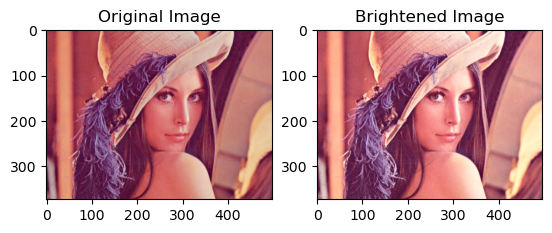

In [14]:
# display original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# display the brightened image
plt.subplot(1, 2, 2)
plt.imshow(image_brighter)
plt.title('Brightened Image')

#### Part 3
##### select areas with shades of red and set Cr (red chrominance) values to zero:

In [15]:
# convert image to YCbCr again
image_ycbcr = image.convert('YCbCr')

In [16]:
# set threshold for selecting red areas
red_lower = (100, 0, 0)
red_upper = (255, 100, 100)

In [18]:
# Create a mask for red areas
mask = Image.new('L', image.size)  # Create a new grayscale image for the mask
for x in range(image.width):
    for y in range(image.height):
        pixel = image_ycbcr.getpixel((x, y))
        if red_lower[0] < pixel[0] < red_upper[0] and red_lower[1] < pixel[1] < red_upper[1] and red_lower[2] < pixel[2] < red_upper[2]:
            mask.putpixel((x, y), 255)  # Set white (255) for red areas in the mask
        else:
            mask.putpixel((x, y), 0)    # Set black (0) for non-red areas in the mask

In [19]:
# Convert mask to binary image (black and white)
mask = mask.point(lambda p: 255 if p > 0 else 0)

In [24]:
# set Cr values to zero for selected areas
Y, Cb, Cr = image_ycbcr.split()
Cr = Cr.point(lambda i: 0 if mask.getpixel((x, y)) else i)

In [25]:
# convert back to RGB
image_red_filtered = Image.merge('YCbCr', (Y, Cb, Cr)).convert('RGB')

Text(0.5, 1.0, 'Image Red filtered')

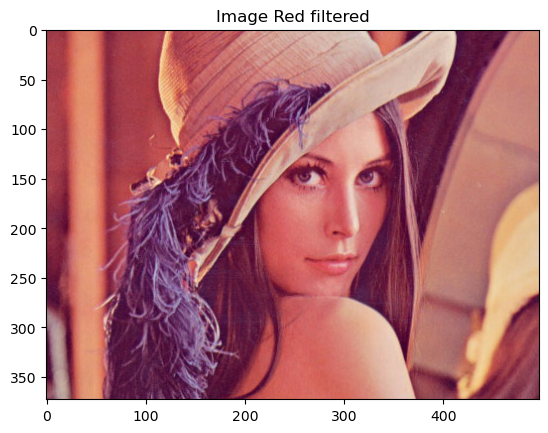

In [26]:
# display the filtered image
#plt.subplot(1, 2, 1)
plt.imshow(image_red_filtered)
plt.title('Image Red filtered')

#### Part 4
##### down-sample and up-sample Cb and Cr components:

In [27]:
# down-sample Cb and Cr components
Cb_downsampled = Cb.resize((width//2, height//2), Image.BOX)
Cr_downsampled = Cr.resize((width//2, height//2), Image.BOX)

In [28]:
# up-sample Cb and Cr components
Cb_upsampled = Cb_downsampled.resize((width, height), Image.BOX)
Cr_upsampled = Cr_downsampled.resize((width, height), Image.BOX)

In [29]:
# reconstruct the image
image_reconstructed = Image.merge('YCbCr', (Y, Cb_upsampled, Cr_upsampled)).convert('RGB')

Text(0.5, 1.0, 'Reconstructed Image')

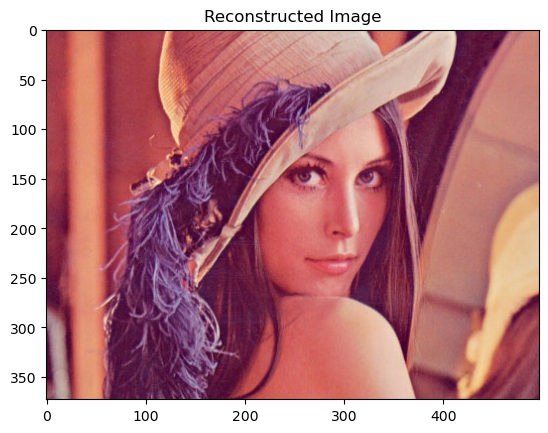

In [30]:
# display the reconstructed image
#plt.subplot(1, 2, 1)
plt.imshow(image_reconstructed)
plt.title('Reconstructed Image')

#### Part 5
##### down-sample and up-sample all three components

In [31]:
# down-sample all three components
Y_downsampled = Y.resize((width//2, height//2), Image.BOX)
Cb_downsampled = Cb.resize((width//2, height//2), Image.BOX)
Cr_downsampled = Cr.resize((width//2, height//2), Image.BOX)

In [32]:
# up-sample all three components
Y_upsampled = Y_downsampled.resize((width, height), Image.BOX)
Cb_upsampled = Cb_downsampled.resize((width, height), Image.BOX)
Cr_upsampled = Cr_downsampled.resize((width, height), Image.BOX)

In [33]:
# reconstruct the image
image_reconstructed_all = Image.merge('YCbCr', (Y_upsampled, Cb_upsampled, Cr_upsampled)).convert('RGB')

Text(0.5, 1.0, 'Image Re-reconstructed')

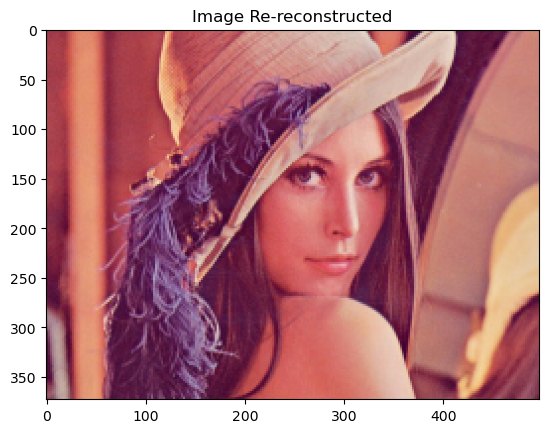

In [34]:
# display the re-reconstructed image
#plt.subplot(1, 2, 1)
plt.imshow(image_reconstructed_all)
plt.title('Image Re-reconstructed')

It becomes blur or the quality drops